In [1]:
import numpy
import os
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

Using TensorFlow backend.


In [2]:
# Load Test and Train Files¶

files_train = 0
files_validation = 0

cwd = os.getcwd()
folder = 'cnnmodel/train'
for sub_folder in os.listdir(folder):
    path, dirs, files = next(os.walk(os.path.join(folder,sub_folder)))
    files_train += len(files)


folder = 'cnnmodel/test'
for sub_folder in os.listdir(folder):
    path, dirs, files = next(os.walk(os.path.join(folder,sub_folder)))
    files_validation += len(files)

print(files_train,files_validation)

129 86


In [3]:
#Set key parameters
img_width, img_height = 48, 144
train_data_dir = "cnnmodel/train"
validation_data_dir = "cnnmodel/test"
nb_train_samples = files_train
nb_validation_samples = files_validation
batch_size = 32
epochs = 70
num_classes = 2

In [4]:
#Build model on top of a trained VGG
model = applications.VGG16(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))
# Freeze the layers which you don't want to train. Here I am freezing the first 5 layers.
for layer in model.layers[:10]:
    layer.trainable = False

In [5]:
x = model.output
x = Flatten()(x)

predictions = Dense(num_classes, activation="softmax")(x)

# creating the final model
model_final = Model(input = model.input, output = predictions)

# compile the model
model_final.compile(loss = "categorical_crossentropy", 
                    optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), 
                    metrics=["accuracy"]) # See learning rate is very low

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  import sys


In [6]:
# Initiate the train and test generators with data Augumentation
train_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.1,
width_shift_range = 0.1,
height_shift_range=0.1,
rotation_range=5)

test_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.1,
width_shift_range = 0.1,
height_shift_range=0.1,
rotation_range=5)

train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_width,img_height),
batch_size = batch_size,
class_mode = "categorical")

validation_generator = test_datagen.flow_from_directory(
validation_data_dir,
target_size = (img_width, img_height),
class_mode = "categorical")

Found 129 images belonging to 2 classes.
Found 86 images belonging to 2 classes.


In [7]:
# Save the model according to the conditions
checkpoint = ModelCheckpoint("car.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, 
                             mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=1, mode='auto')


In [8]:
# Start training!

history_object = model_final.fit_generator(
train_generator,
samples_per_epoch = nb_train_samples,
epochs = epochs,
validation_data = validation_generator,
nb_val_samples = nb_validation_samples,
callbacks = [checkpoint, early])

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if __name__ == '__main__':
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., epochs=70, validation_data=<keras.pre..., callbacks=[<keras.ca..., steps_per_epoch=4, validation_steps=86)`
  if __name__ == '__main__':



Epoch 1/70
4/4 [==============================] - 14s 3s/step - loss: 0.6592 - accuracy: 0.6094 - val_loss: 0.6512 - val_accuracy: 0.5858

Epoch 00001: val_accuracy improved from -inf to 0.58576, saving model to car.h5
Epoch 2/70
4/4 [==============================] - 10s 3s/step - loss: 0.5485 - accuracy: 0.6598 - val_loss: 0.6155 - val_accuracy: 0.6946

Epoch 00002: val_accuracy improved from 0.58576 to 0.69456, saving model to car.h5
Epoch 3/70
4/4 [==============================] - 9s 2s/step - loss: 0.5203 - accuracy: 0.8041 - val_loss: 0.5028 - val_accuracy: 0.7575

Epoch 00003: val_accuracy improved from 0.69456 to 0.75751, saving model to car.h5
Epoch 4/70
4/4 [==============================] - 9s 2s/step - loss: 0.5659 - accuracy: 0.8144 - val_loss: 0.4588 - val_accuracy: 0.7249

Epoch 00004: val_accuracy did not improve from 0.75751
Epoch 5/70
4/4 [==============================] - 9s 2s/step - loss: 0.5219 - accuracy: 0.8247 - val_loss: 0.4220 - val_accuracy: 0.8599

Epoch 

4/4 [==============================] - 9s 2s/step - loss: 0.0897 - accuracy: 0.9545 - val_loss: 0.1422 - val_accuracy: 0.9622

Epoch 00039: val_accuracy did not improve from 0.97076
Epoch 40/70
4/4 [==============================] - 10s 2s/step - loss: 0.0846 - accuracy: 0.9609 - val_loss: 0.0976 - val_accuracy: 0.9624

Epoch 00040: val_accuracy did not improve from 0.97076
Epoch 41/70
4/4 [==============================] - 9s 2s/step - loss: 0.0869 - accuracy: 0.9588 - val_loss: 0.0712 - val_accuracy: 0.9618

Epoch 00041: val_accuracy did not improve from 0.97076
Epoch 42/70
4/4 [==============================] - 10s 2s/step - loss: 0.0922 - accuracy: 0.9588 - val_loss: 0.0613 - val_accuracy: 0.9647

Epoch 00042: val_accuracy did not improve from 0.97076
Epoch 43/70
4/4 [==============================] - 9s 2s/step - loss: 0.0540 - accuracy: 0.9922 - val_loss: 0.2016 - val_accuracy: 0.9693

Epoch 00043: val_accuracy did not improve from 0.97076
Epoch 44/70
4/4 [=======================

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


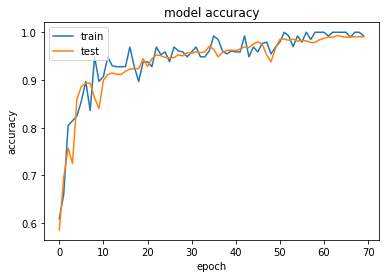

In [11]:
import matplotlib.pyplot as plt
print(history_object.history.keys())
plt.plot(history_object.history['accuracy'])
plt.plot(history_object.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

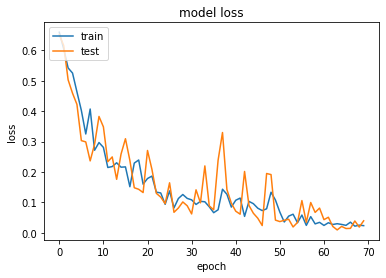

In [12]:
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()